In [2]:
from bs4 import BeautifulSoup as bs
# !pip3 install networkx
# !pip3 install matplotlib
import requests


next_page = "https://rm.wikipedia.org/w/index.php?title=Spezial:AllPages" #starting wikipedia page
a_links = [] #table of Wikipedia articles
b_links = []

flag = True #boolean
dict = {}

while flag: 

    res = requests.get(next_page)  #request page
#     print(res.text)
    soup = bs(res.text, "html.parser") #beautiful page constructor
    flag = False 
    for link in soup.find_all("a"): #finds all the "a" classes in the webpage

        url = link.get("href", "") #gets all the hyperlinks from the "a" class
#         print(url)
        if "proxima pagina" in link.text.strip(): #if the link leads to the next page of all articles
            next_page = "https://rm.wikipedia.org" + url #change the starting wikipedia page to the next one
#             print (next_page)
            flag = True  #change flag to true
            continue 

        if url=='https://rm.wikipedia.org/wiki/Spezial:AllPages': #if last page break
            break

        if "/wiki" in url: #if the link leads to another wiki page
            go_to = "https://rm.wikipedia.org" + url #save that link
#             print(url[6:])
            a_links.append(url[6:]) #link format /wiki/article, save the "article" name at the a_links list
                
matrix=[] #creates a zero content 2d matrix with the length and width of a_links list
for i in range(len(a_links)): 
    row=[] 
    for j in range(len(a_links)): 
        row.append(0) 
    matrix.append(row) 


In [2]:
len(a_links)


4544

In [3]:
flag = True #flag = true
dict = {}
i = 0
j = 0
k = len(a_links)
d = []
next_page = "https://rm.wikipedia.org/w/index.php?title=Spezial:AllPages" #resets the starting page 

while flag:
#     print(next_page)
#     print(len(dict))
    res = requests.get(next_page) 
#     print(res.text)
    soup = bs(res.text, "html.parser")
    flag = False
    for link in soup.find_all("a"):

        url = link.get("href", "")
#         print(url)
        if "proxima pagina" in link.text.strip():
            next_page = "https://rm.wikipedia.org" + url
            print(url)
            flag = True
            continue 

        if url=='https://rm.wikipedia.org/wiki/Spezial:AllPages':
            break

        if "/wiki" in url:
#             dict[link.text.strip()] = url
            go_to = "https://rm.wikipedia.org" + url
#             print(url[6:])
            
    #same as above till this line
            
#             print(go_to)
            res2 = requests.get(go_to) #requests each article's content
            soup2 = bs(res2.text, "html.parser") #bs constructor of each wikipedia article
            texts = soup2.find(class_="mw-parser-output") #finds the class of the main body of the article
#             print(texts)
            b_links.clear() 
            for links in texts.find_all('a'): #finds all the "a" classes in the article
                urls2 = links.get("href", "") #finds all the links from the "a" classes
                if "/wiki" in urls2: #if it leads to another wikipedia article
                    if not "redlink=1" in urls2: #ignores all links that lead to an article that does not exist
                        if not "action=edit" in urls2: #ignores all edit links of the article
                            if not "Datoteca" in urls2: #ignores all links that lead to a media file
                                if not ":" in urls2: #ignores all command links
                                    for j in range(0,k): #scans all the existing articles at a_links list
#                                         print (i)
#                                         print (j)
                                        if urls2[6:] == a_links[j]: #if the link name matches an existing name at that list
                                            matrix[i][j] = 1 #make that cell =1
            i = i + 1 #move to the next article
            

/w/index.php?title=Spezial:AllPages&from=Bedano
/w/index.php?title=Spezial:AllPages&from=Bedano
/w/index.php?title=Spezial:AllPages&from=Cavardiras
/w/index.php?title=Spezial:AllPages&from=Cavardiras
/w/index.php?title=Spezial:AllPages&from=Cuarnens
/w/index.php?title=Spezial:AllPages&from=Cuarnens
/w/index.php?title=Spezial:AllPages&from=Extra+calvinisticum
/w/index.php?title=Spezial:AllPages&from=Extra+calvinisticum
/w/index.php?title=Spezial:AllPages&from=Grindel
/w/index.php?title=Spezial:AllPages&from=Grindel
/w/index.php?title=Spezial:AllPages&from=Killwangen
/w/index.php?title=Spezial:AllPages&from=Killwangen
/w/index.php?title=Spezial:AllPages&from=Londra
/w/index.php?title=Spezial:AllPages&from=Londra
/w/index.php?title=Spezial:AllPages&from=Muggio
/w/index.php?title=Spezial:AllPages&from=Muggio
/w/index.php?title=Spezial:AllPages&from=Percepziun
/w/index.php?title=Spezial:AllPages&from=Percepziun
/w/index.php?title=Spezial:AllPages&from=Romandie
/w/index.php?title=Spezial:All

In [4]:
len(matrix)



4544

In [4]:
import networkx as nx
G = nx.DiGraph() #graph constructor
for u in range(len(a_links)): #scan the matrix table
    G.add_node(a_links[u]) #add all strings from a_links table as nodes
    for v in range(len(a_links)):
        if matrix[u][v] == 1: #if the is a non zero cell
            G.add_edge(a_links[u],a_links[v]) #make an edge between the urls2 article and the correspondant a_lists article
                

In [14]:
import networkx as nx
M = nx.Graph() #graph constructor
for u in range(len(a_links)): #scan the matrix table
    for v in range(len(a_links)):
        if matrix[u][v] == 1: #if the is a non zero cell
            M.add_node(a_links[u])
            M.add_edge(a_links[u],a_links[v]) #make an edge between the urls2 article and the correspondant a_lists article
                

In [6]:
nx.number_of_isolates(G)

80

In [8]:
nx.density(G)

0.004407512098786866

In [10]:
G.number_of_edges()

90986

In [26]:
nx.average_clustering(G)

0.4478117108513411

In [16]:
deg = list(G.degree)
deg.sort(key = operator.itemgetter(1))
print(deg)

[('1464_Cuira', 0), ('15_a._Cr.', 0), ('700_s._Cr.', 0), ('Actinopterygii', 0), ('Adam_Quadroni', 0), ('Assimilaziun_linguistica', 0), ('Audrey_Hepburn', 0), ('Ave_Maria', 0), ('Bilinguitad_additiva', 0), ('Campiuns_Svizzers_en_Ballap%C3%A8', 0), ('Catoira', 0), ('Chester_Bennington', 0), ('Chor_rumantsch/romontsch', 0), ('Circul_da_quintas', 0), ('Clav_rumantscha', 0), ('Club_da_Ballape_Lai-Valbella', 0), ('Code_restrensch%C3%AC_e_code_elev%C3%A0', 0), ('Current_events', 0), ('D.Camenisch/Cudeschs/Classica_viennaisa/Introducziun', 0), ('Dario_Cologna', 0), ('Detga_da_Sasolas', 0), ('Detga_da_Val', 0), ('Detga_da_Val_(sursilvan)', 0), ('Detga_dil_signur_da_Schluein', 0), ('Detgas_da_Siat', 0), ('Detgas_da_Trin', 0), ('Detgas_e_praulas_da_Tujetsch', 0), ('Federica_de_Cesco', 0), ('Felis_catus', 0), ('Felis_silvestris_catus', 0), ('Fonoteca_Naziunala_Svizra', 0), ('Grammaticas_rumantschas', 0), ('Hans_de_Beer', 0), ('Istorgia_dal_film', 0), ('LIR', 0), ('La_musca_dubiusa', 0), ('La_pinta

In [16]:
print(list(nx.shortest_path(G, a_links[35], a_links[128])))
print(list(nx.shortest_path(G, a_links[56], a_links[128])))
print(list(nx.shortest_path(G, a_links[55], a_links[420])))
print(list(nx.shortest_path(G, a_links[665], a_links[500])))
print(list(nx.shortest_path(G, a_links[543], a_links[52])))
print(list(nx.shortest_path(G, a_links[132], a_links[12])))
print(list(nx.shortest_path(G, a_links[510], a_links[1025])))
print(list(nx.shortest_path(G, a_links[350], a_links[1025])))
print(list(nx.shortest_path(G, a_links[87], a_links[3128])))
print(list(nx.shortest_path(G, a_links[560], a_links[300])))
print(list(nx.shortest_path(G, a_links[1000], a_links[3000])))

['Abraham', 'Cristianissem', 'Augustinus_da_Hippo', 'Filosofia', 'Abraham_Lincoln', 'Andrew_Johnson']
['Afghanistan', 'Asia', 'Egipta', 'Republica', 'Abraham_Lincoln', 'Andrew_Johnson']
['Afganistan', 'Asia', 'Muntogna', 'Mund', 'Mund_(VS)', 'Birgisch']
['Caslano', 'Alto_Malcantone', 'Italia', 'Imperi_roman', 'Plinius_il_Giuven', 'Brevs_da_Plinius']
['Budissem', 'Germania', 'Adolf_Hitler']
['Angola', 'Botswana', 'Republica', 'Abraham_Lincoln', '1861']
['Brione_sopra_Minusio', 'Svizra', 'America_dal_Nord', 'Cristof_Columbus']
['Beiva', 'Svizra', 'America_dal_Nord', 'Cristof_Columbus']
['Algeria', 'Chapitala', 'Svizra', 'Friburg', 'Pierrafortscha']
['Bursins', 'Vad', 'Svizra', 'Islam', 'Uraziun', 'Bapnos']
['Courgenay', 'Clos_du_Doubs', 'Svizra', 'Istorgia_da_la_Svizra', 'PPS']


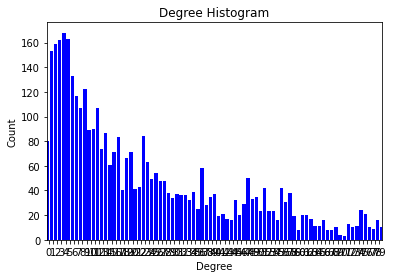

In [32]:
import collections
import matplotlib.pyplot as plt
import networkx as nx



degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
ax.set_xlim(0,80)

plt.savefig('romansch1.png', dpi=300)


In [13]:
p = nx.clustering(G)

In [14]:
p = nx.clustering(G)
import operator
sorted_cluster_ndl = sorted(p.items(), key = operator.itemgetter(1))
print(sorted_cluster_ndl)

[('1200_s._Cr._Rumantschia', 0), ('1367', 0), ('1436', 0), ('1464', 0), ('1464_Cuira', 0), ('1560', 0), ('15_a._Cr.', 0), ('1794', 0), ('1938', 0), ('700_s._Cr.', 0), ('Margarita_Gangale-Uffer', 0), ('Achal_Prabhala', 0), ('Acquafraggia', 0), ('Actinopterygii', 0), ('Adam_Nauli', 0), ('Adam_Quadroni', 0), ('Addis_Abeba', 0), ('Agamemnon', 0), ('Trient', 0), ('Aluminium', 0), ('Oxigen', 0), ('Ampezo', 0), ('Sur_En', 0), ('Chariels', 0), ('Evoluziun', 0), ('Antigone', 0), ('Antoni_Maria_Alcover', 0), ('Apple', 0), ('Crap_da_Rosetta', 0), ('Ciudad_Aut%C3%B3noma_de_Buenos_Aires', 0), ('Art._3_da_la_Constituziun_chantunala', 0), ('Art._70_da_la_Constituziun_federala', 0), ('Artitgel_da_linguas', 0), ('Assimilaziun_linguistica', 0), ('Mollens', 0), ('Audrey_Hepburn', 0), ('Augustin_Vincent', 0), ('Kevin_Rudd', 0), ('La_Posta_Svizra', 0), ('Auturs_contemporans', 0), ('Clau_Thunet_Vuolp', 0), ('Dominique_Dosch', 0), ('Flurin_Darms', 0), ('Ave_Maria', 0), ('Aves', 0), ('Utsch%C3%A8', 0), ('D%C3

In [15]:
c = nx.degree_centrality(G)
import operator
sorted_centrality_rm = sorted(c.items(), key = operator.itemgetter(1))
print(sorted_centrality_rm)

[('1464_Cuira', 0.0), ('15_a._Cr.', 0.0), ('700_s._Cr.', 0.0), ('Actinopterygii', 0.0), ('Adam_Quadroni', 0.0), ('Assimilaziun_linguistica', 0.0), ('Audrey_Hepburn', 0.0), ('Ave_Maria', 0.0), ('Bilinguitad_additiva', 0.0), ('Campiuns_Svizzers_en_Ballap%C3%A8', 0.0), ('Catoira', 0.0), ('Chester_Bennington', 0.0), ('Chor_rumantsch/romontsch', 0.0), ('Circul_da_quintas', 0.0), ('Clav_rumantscha', 0.0), ('Club_da_Ballape_Lai-Valbella', 0.0), ('Code_restrensch%C3%AC_e_code_elev%C3%A0', 0.0), ('Current_events', 0.0), ('D.Camenisch/Cudeschs/Classica_viennaisa/Introducziun', 0.0), ('Dario_Cologna', 0.0), ('Detga_da_Sasolas', 0.0), ('Detga_da_Val', 0.0), ('Detga_da_Val_(sursilvan)', 0.0), ('Detga_dil_signur_da_Schluein', 0.0), ('Detgas_da_Siat', 0.0), ('Detgas_da_Trin', 0.0), ('Detgas_e_praulas_da_Tujetsch', 0.0), ('Federica_de_Cesco', 0.0), ('Felis_catus', 0.0), ('Felis_silvestris_catus', 0.0), ('Fonoteca_Naziunala_Svizra', 0.0), ('Grammaticas_rumantschas', 0.0), ('Hans_de_Beer', 0.0), ('Istor

In [1]:
nx.average_clustering(G)

NameError: name 'nx' is not defined

In [14]:
n_e = nx.all_neighbors(G,'Europa')

In [35]:
sumy = 0
no_paths = 0
for i in range(0,400):
    flag = 0
    for j in range(0,400):
        if nx.has_path(G, a_links[i],a_links[j]):
            
            flag = flag + len(nx.shortest_path(G,a_links[i],a_links[j]))
        else:
            no_paths = no_paths + 1
    sumy = sumy + flag
        


In [36]:
print(sumy)
x = sumy/(400*400)
print(x)
print(no_paths)



555360
3.471
49449


In [23]:
import networkx as nx
import matplotlib.pyplot as plt

degree_sequence = sorted([d for n, d in nx.clustering(G)], reverse=True)
# print "Degree sequence", degree_sequence
dmax = max(degree_sequence)

plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")


plt.show()

plt.savefig("degree_cluster.png")

ValueError: too many values to unpack (expected 2)

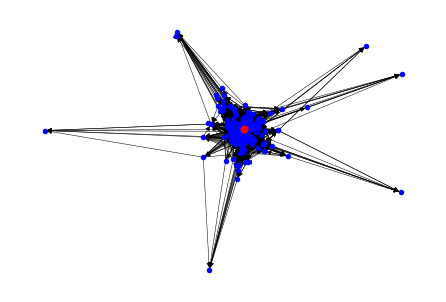

<Figure size 432x288 with 0 Axes>

In [7]:

from operator import itemgetter

import matplotlib.pyplot as plt
import networkx as nx

if __name__ == '__main__':
    # Create a BA model graph
    n = 1000
    m = 2
    # find node with largest degree
    node_and_degree = G.degree()
    (largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
    # Create ego graph of main hub
    hub_ego = nx.ego_graph(G, largest_hub)
    # Draw graph
    pos = nx.spring_layout(hub_ego)
    nx.draw(hub_ego, pos, node_color='b', node_size=20, width=0.5, with_labels=False)
    # Draw ego as large and red
    nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=50, node_color='r')
    plt.show()
    plt.savefig('romansch3.png', dpi=400)

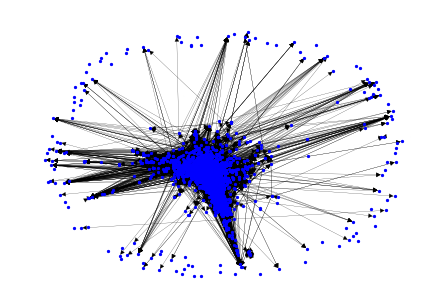

<Figure size 432x288 with 0 Axes>

In [17]:
from operator import itemgetter

import matplotlib.pyplot as plt
import networkx as nx

if __name__ == '__main__':
    # Create a BA model graph
    n = 1000
    m = 2
    # find node with largest degree

    nx.draw(G, node_color='b', node_size=5, width=0.2)
    # Draw ego as large and red

    plt.show()
    plt.savefig('romansch5.png', dpi=400)

In [19]:
O = nx.fast_gnp_random_graph(4000, 0.04, directed="True")
nx.average_clustering(O)

0.04003422389585388